# 第5章 相関係数


---
[Google Colaboratoryで開く](https://colab.research.google.com/github/202408pythonciot/Statistics/blob/main/_Textbook/Lesson_05/Colab/Lesson_05.ipynb)

<a target="_blank" href="https://colab.research.google.com/github/202408pythonciot/Statistics/blob/main/_Textbook/Lesson_05/Colab/Lesson_05.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

ブルーコーヒー店とレッドコーヒー店の8月平日のアイスコーヒーの売上個数の分析を行います。アイスコーヒーの売上個数と最高気温の関係性について相関係数を求めます。

---

## 事前準備
matplotlibの日本語化，pandas matplotlibのライブラリのインポート，サンプルデータのダウンロードを行います。

In [ ]:
# matplotlibの日本語化
!pip install japanize-matplotlib

# pandas matplotlibのライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# 標本データのダウンロード
!wget https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_05/Sample_Data/blue_coffee_shop.csv -O blue_coffee_shop.csv
!wget https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_05/Sample_Data/red_coffee_shop.csv -O red_coffee_shop.csv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=79e225b1838aba77e98d17a7322e1574a6b728da5c9e0ccc900d39faf938a89b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
--2024-10-19 11:06:41--  https://raw.githubusercontent.com/202408pythonciot/Statistics/refs/heads/main/_Textbook/Lesson_05/Sample_Data/blue_coffee_shop.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145 [text/plain]
Saving to: ‘blue_coffee_shop.csv’

blue_coffee_shop.cs 100%[===================>]     145  --.-KB/s    

ブルーコーヒー店とレッドコーヒー店の売上個数データをPandasに読み込む

In [ ]:
blue_coffee_shop = pd.read_csv("./blue_coffee_shop.csv")
red_coffee_shop = pd.read_csv("./red_coffee_shop.csv")

## 散布図の作成

### ブルーコーヒー店の散布図の作成
ブルーコーヒー店のアイスコーヒーの売上個数を横軸に，最高気温を縦軸にとった散布図を作成します。

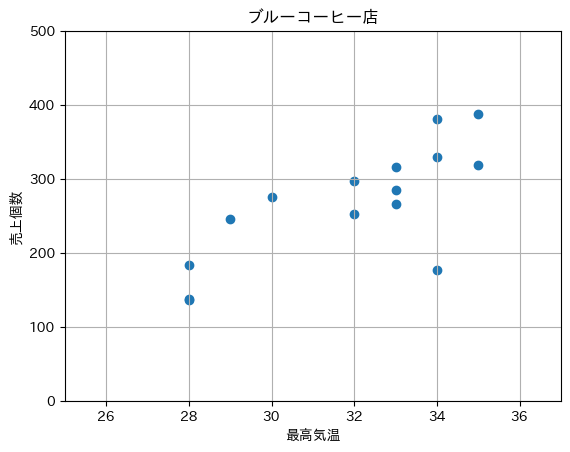

In [ ]:
plt.scatter(blue_coffee_shop['最高気温'], blue_coffee_shop['売上個数'])
plt.title('ブルーコーヒー店')
plt.xlabel('最高気温')
plt.ylabel('売上個数')
plt.xlim([25, 37])
plt.ylim([0, 500])
plt.grid()
plt.show()

### レッドコーヒー店の散布図の作成
レッドコーヒー店のアイスコーヒーの売上個数を横軸に，最高気温を縦軸にとった散布図を作成します。

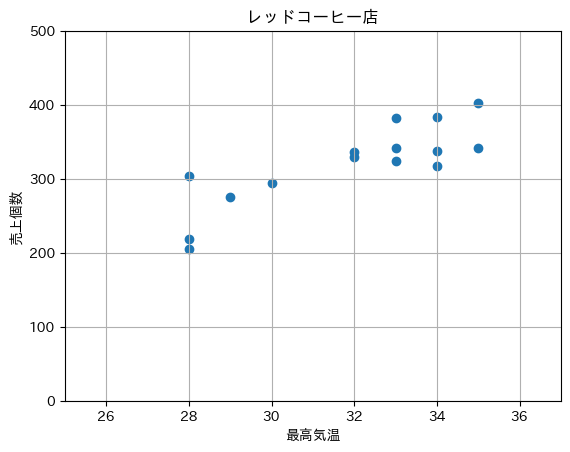

In [ ]:
plt.scatter(red_coffee_shop['最高気温'], red_coffee_shop['売上個数'])
plt.title('レッドコーヒー店')
plt.xlabel('最高気温')
plt.ylabel('売上個数')
plt.xlim([25, 37])
plt.ylim([0, 500])
plt.grid()
plt.show()

## 相関係数
ブルーコーヒー店のアイスコーヒーの売上個数と最高気温の相関係数を求めます。

### 定義通りに求める

In [ ]:
diff_x = []
diff_y = []

# 偏差xを求める
for tmp in blue_coffee_shop['最高気温']:
  diff_x.append(tmp - blue_coffee_shop['最高気温'].mean())

# 偏差yを求める
for tmp in blue_coffee_shop['売上個数']:
  diff_y.append(tmp - blue_coffee_shop['売上個数'].mean())

# 偏差積を求める
m_xy = list(map(lambda x, y: x * y, diff_x, diff_y))

# 偏差積の平均を求める
m_xy_mean = sum(m_xy)/len(m_xy)

# 相関係数を求める
r = m_xy_mean/blue_coffee_shop['最高気温'].std(ddof=0)/blue_coffee_shop['売上個数'].std(ddof=0)
print('最高気温と売上個数の相関係数', r)

最高気温と売上個数の相関係数 0.761059333406429


### corrメソッド
pandasのcorrメソッドを使うと相関係数が求められます。

In [ ]:
blue_coffee_shop.corr()


,最高気温,売上個数
最高気温,1.000000,0.761059
売上個数,0.761059,1.000000


## 相関の強さ
相関係数は-1から1の範囲で値を取ります。一般に相関係数はギリシャ文字$\rho$を用います。

| **　　相関係数の範囲　　** | **　　意味　　** |
| --- | --- |
| $-1 \leqq \rho < -0.7 $ | 強い負の相関がある |
| $-0.7 \leqq \rho < -0.4 $ | 中程度の負の相関がある |
| $-0.4 \leqq \rho < -0.2 $ | 弱い負の相関がある |
| $-0.2 \leqq \rho < 0.2 $ | ほとんど相関がない |
| $0.2 \leqq \rho < 0.4 $ | 弱い正の相関がある |
| $0.4 \leqq \rho < 0.7 $ | 中程度の正の相関がある |
| $0.7 \leqq \rho \leqq 1.0 $ | 強い正の相関がある |

